In [152]:
%matplotlib inline

In [153]:
import matplotlib.pylab as plt 


In [154]:
# routlines for analyzing odes
import sys
import pickle as pk
import numpy as np
sys.path.append('/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/pkh-code/fitting')
import analyzeGotran as ao

reads pickles generated by the following line:

<code> python daisychain.py -t 0.1 -jit -odeName p2x4_MG.ode -var CNt_NFAT 0.15 -var stim_amplitude 100 -T 10000 -iters 1 -name atp100_NFAT0p15.pickle </code>


In [155]:
# Mackay2016 P2X4 ATP 100 uM st 50
t10 = np.array([9.375,8.8541666667,11.4583333333,18.75,26.5625,30.2083333333,41.6666666667,65.1041666667,
                304.1666666667+6,305.7291666667+6,308.8541666667+6,319.7916666667+6,326.5625+6,361.4583333333+6])
y10 = np.array([0,-2195.1219512195,-902.4390243902,-396.3414634146,-140.243902439,-67.0731707317,-12.1951219512,0,
                0,-530.487804878,-176.8292682927,-54.8780487805,-18.2926829268,0])

# Toulme P2X4 MG ATP st 30s 100 uM
t19 = np.array([0,0.2040816327,1.734693878,4.693877551,8.571428571,13.7755102,24.08163265,34.69387755])+300
y19 = 0.001*np.array([0,-366.8965517,-270.3448276,-171.0344828,-107.5862069,-57.93103448,-22.06896552,2.75862069])

# Yan P2X7 HEK ATP st 120s 100 uM
t12 = np.array([0,6.41221374,30.6870229,53.12977099,95.26717557,119.5419847,123.6641221,127.7862595])
y12 = np.array([0,-0.006428571429,-0.01303571429,-0.01428571429,-0.01345238095,-0.01255952381,-0.0008333333333,-0.000119047619])

# Yan P2X7 HEK ATP st 120s 320 uM
t11 = np.array([0,1.832061069,11.45038168,16.48854962,67.78625954,119.0839695,122.7480916,127.7862595])
y11 = np.array([0,-0.03928571429,-0.05142857143,-0.05142857143,-0.04464285714,-0.04107142857,-0.002321428571,-0.00125])

# Yan P2X7 HEK ATP st 120s 1000 uM
t15 = np.array([0,0,7.328244275,25.64885496,32.97709924,53.58778626,79.23664122,94.80916031,107.1755725,118.6259542,120.9160305,122.2900763])
y15 = np.array([0,-0.0505952381,-0.06845238095,-0.08035714286,-0.09523809524,-0.2083333333,-0.5863095238,-0.8392857143,-0.8988095238,-0.9077380952,0.03273809524,0.002976190476])


In [156]:
data0 = ao.readPickle("/home/AD/bch265/Data_storage/p2x4_MacKay50st_100uMATP_new_cat.pickle")
data1 = ao.readPickle("/home/AD/bch265/Data_storage/p2x4_Toulme30st_100uMATP_new_cat.pickle")
data0a = ao.readPickle("/home/AD/bch265/Data_storage/p2x4_MacKay50st_100uMATP_total_new_cat.pickle")
data1a = ao.readPickle("/home/AD/bch265/Data_storage/p2x4_Toulme30st_100uMATP_total_new_cat.pickle")

Reading /home/AD/bch265/Data_storage/p2x4_MacKay50st_100uMATP_new_cat.pickle
Reading /home/AD/bch265/Data_storage/p2x4_Toulme30st_100uMATP_new_cat.pickle
Reading /home/AD/bch265/Data_storage/p2x4_MacKay50st_100uMATP_total_new_cat.pickle
Reading /home/AD/bch265/Data_storage/p2x4_Toulme30st_100uMATP_total_new_cat.pickle


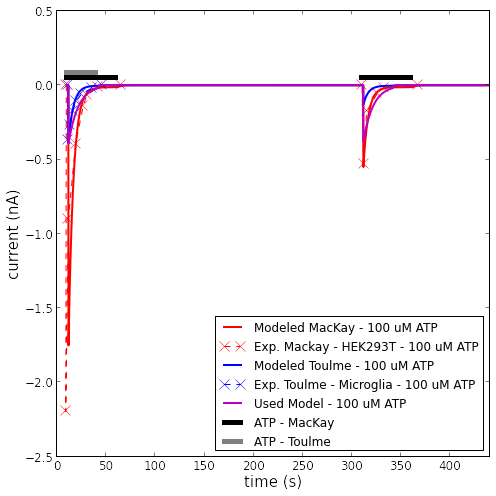

In [140]:
stateLabel = "I_ptxf"
subData0 = ao.GetData(data0,stateLabel)
subData1 = ao.GetData(data1,stateLabel)
subData0a = ao.GetData(data0a,stateLabel)
subData1a = ao.GetData(data1a,stateLabel)

plt.figure(figsize=(4,4))
plt.tick_params(labelsize=12)
plt.plot(subData0.t+10,subData0.valsIdx*4.5*10**6,'r-',linewidth=2,label="Modeled MacKay - 100 uM ATP",alpha=1)
plt.plot(t10,y10/1000,'r--x',linewidth=1,markersize=10,label="Exp. Mackay - HEK293T - 100 uM ATP",alpha=1)
plt.plot(subData1.t+10,subData1.valsIdx*(1e6),'b-',linewidth=2,label="Modeled Toulme - 100 uM ATP",alpha=1)
plt.plot(t19+11-300,y19,'b--x',linewidth=1,markersize=10,label="Exp. Toulme - Microglia - 100 uM ATP")
plt.plot(subData1a.t+10,subData1a.valsIdx*(1e6),'m-',linewidth=2,label="Used Model - 100 uM ATP",alpha=1)

plt.plot([10,60],[0.05,0.05],'black',lw=5,label="ATP - MacKay")
plt.plot([310,360],[0.05,0.05],'black',lw=5)
plt.plot([10,40],[0.08,0.08],'gray',lw=5,label="ATP - Toulme")
#plt.plot([310,340],[0.08,0.08],'gray',lw=5)
plt.xlabel("time (s)",fontsize=15)
plt.ylabel("current (nA)",fontsize=15)
#plt.ylim(-2.5,0.2)
plt.xlim(0,440)
plt.tight_layout()
plt.legend(loc=0,fontsize=12)


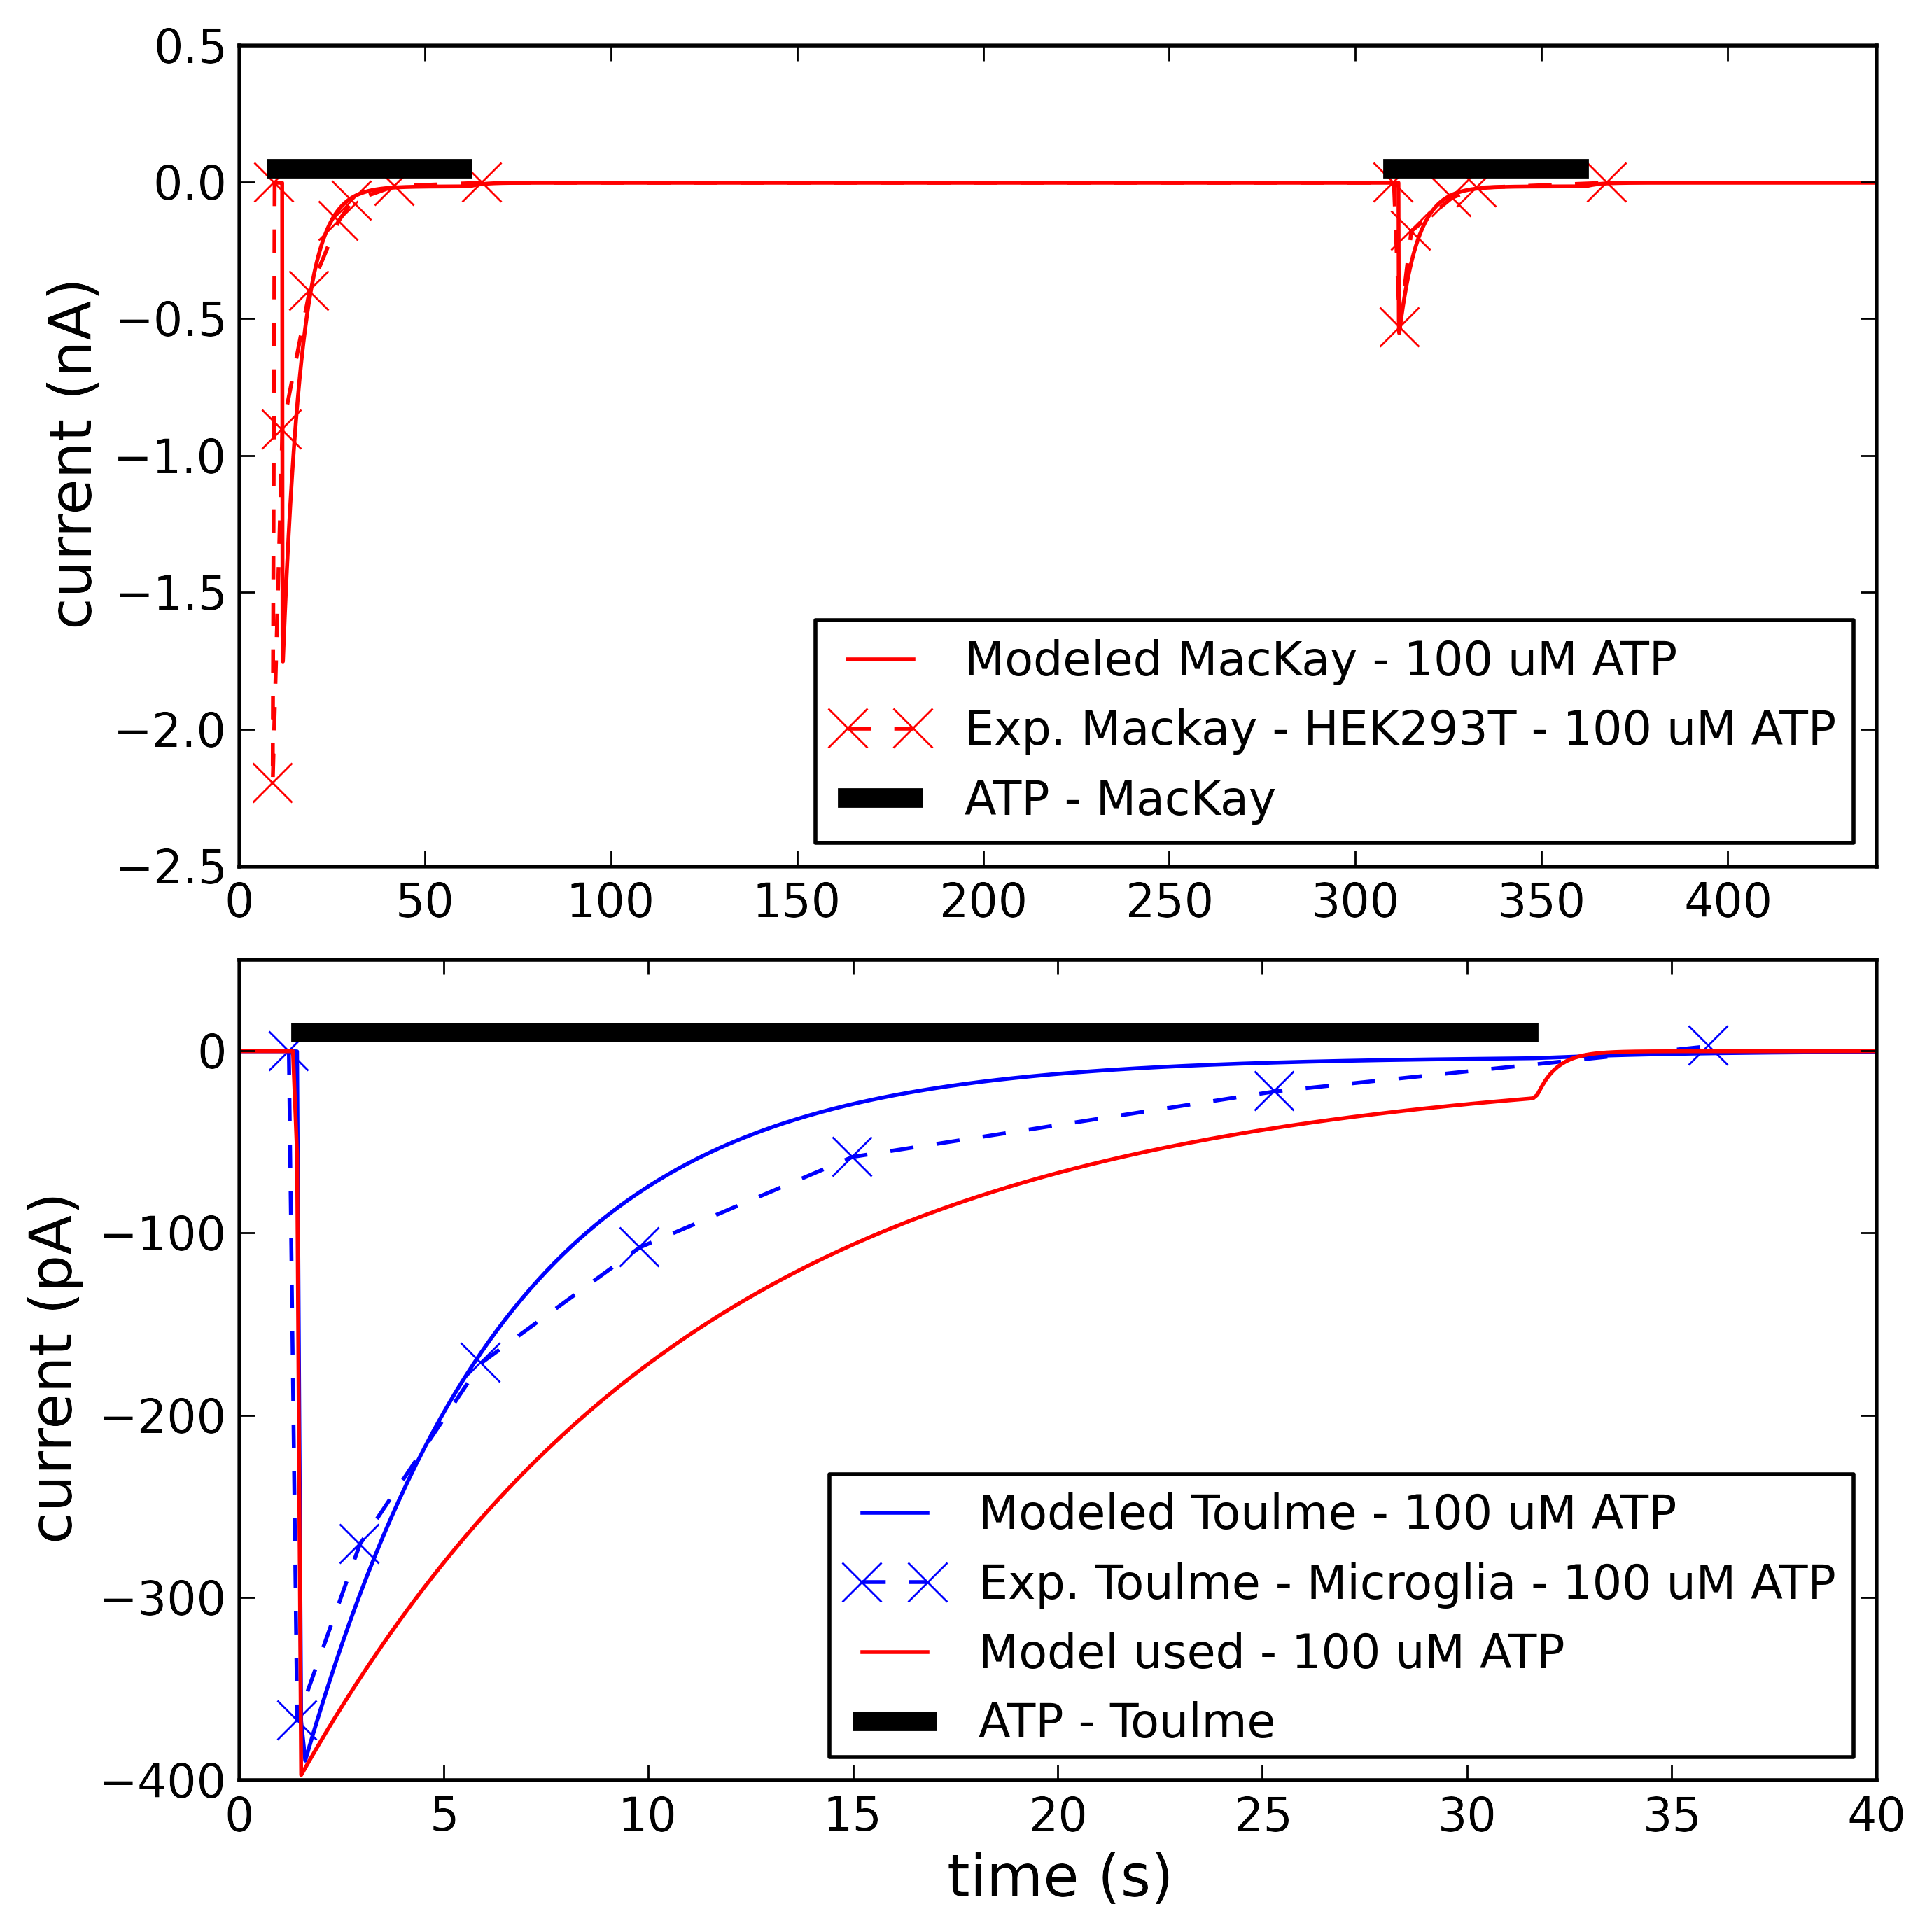

In [157]:
stateLabel = "I_ptxf"
subData0 = ao.GetData(data0,stateLabel)
subData1 = ao.GetData(data1,stateLabel)
subData0a = ao.GetData(data0a,stateLabel)
subData1a = ao.GetData(data1a,stateLabel)

plt.figure(figsize=(7,7),dpi=400)
plt.subplot(2,1,1)
plt.tick_params(labelsize=12)
plt.plot(subData0.t+10,subData0.valsIdx*4.5*10**6,'r-',linewidth=1,label="Modeled MacKay - 100 uM ATP",alpha=1)
plt.plot(t10,y10/1000,'r--x',linewidth=1,markersize=10,label="Exp. Mackay - HEK293T - 100 uM ATP",alpha=1)
plt.plot([10,60],[0.05,0.05],'black',lw=5,label="ATP - MacKay")
plt.plot([310,360],[0.05,0.05],'black',lw=5)
plt.ylabel("current (nA)",fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.xlim(0,440)

plt.subplot(2,1,2)
plt.tick_params(labelsize=12)
plt.plot(subData1.t,subData1.valsIdx*(1e6)*1000,'b-',linewidth=1,label="Modeled Toulme - 100 uM ATP",alpha=1)
plt.plot(t19+1.2-300,y19*1000,'b--x',linewidth=1,markersize=10,label="Exp. Toulme - Microglia - 100 uM ATP")
plt.plot(subData1a.t,subData1a.valsIdx*(1e6)*1000,'r-',linewidth=1,label="Model used - 100 uM ATP",alpha=1)
plt.plot([1.5,30+1.5],[10,10],'k',lw=5,label="ATP - Toulme")
plt.xlabel("time (s)",fontsize=15)
plt.ylabel("current (pA)",fontsize=15)
plt.yticks(np.arange(-400, 1, 100))
plt.xlim(0,40)
plt.tight_layout()
plt.legend(loc=0,fontsize=12)


In [142]:
data2 = ao.readPickle("/home/AD/bch265/Data_storage/p2x7_Yan120st_100uMATP_cat.pickle")
data3 = ao.readPickle("/home/AD/bch265/Data_storage/p2x7_Yan120st_320uMATP_cat.pickle")
data4 = ao.readPickle("/home/AD/bch265/Data_storage/p2x7_Yan120st_1000uMATP_cat.pickle")

data2a = ao.readPickle("/home/AD/bch265/Data_storage/p2x7_Yan120st_100uMATP_total_cat.pickle")
data3a = ao.readPickle("/home/AD/bch265/Data_storage/p2x7_Yan120st_320uMATP_total_cat.pickle")
data4a = ao.readPickle("/home/AD/bch265/Data_storage/p2x7_Yan120st_1000uMATP_total_cat.pickle")

Reading /home/AD/bch265/Data_storage/p2x7_Yan120st_100uMATP_cat.pickle
Reading /home/AD/bch265/Data_storage/p2x7_Yan120st_320uMATP_cat.pickle
Reading /home/AD/bch265/Data_storage/p2x7_Yan120st_1000uMATP_cat.pickle
Reading /home/AD/bch265/Data_storage/p2x7_Yan120st_100uMATP_total_cat.pickle
Reading /home/AD/bch265/Data_storage/p2x7_Yan120st_320uMATP_total_cat.pickle
Reading /home/AD/bch265/Data_storage/p2x7_Yan120st_1000uMATP_total_cat.pickle


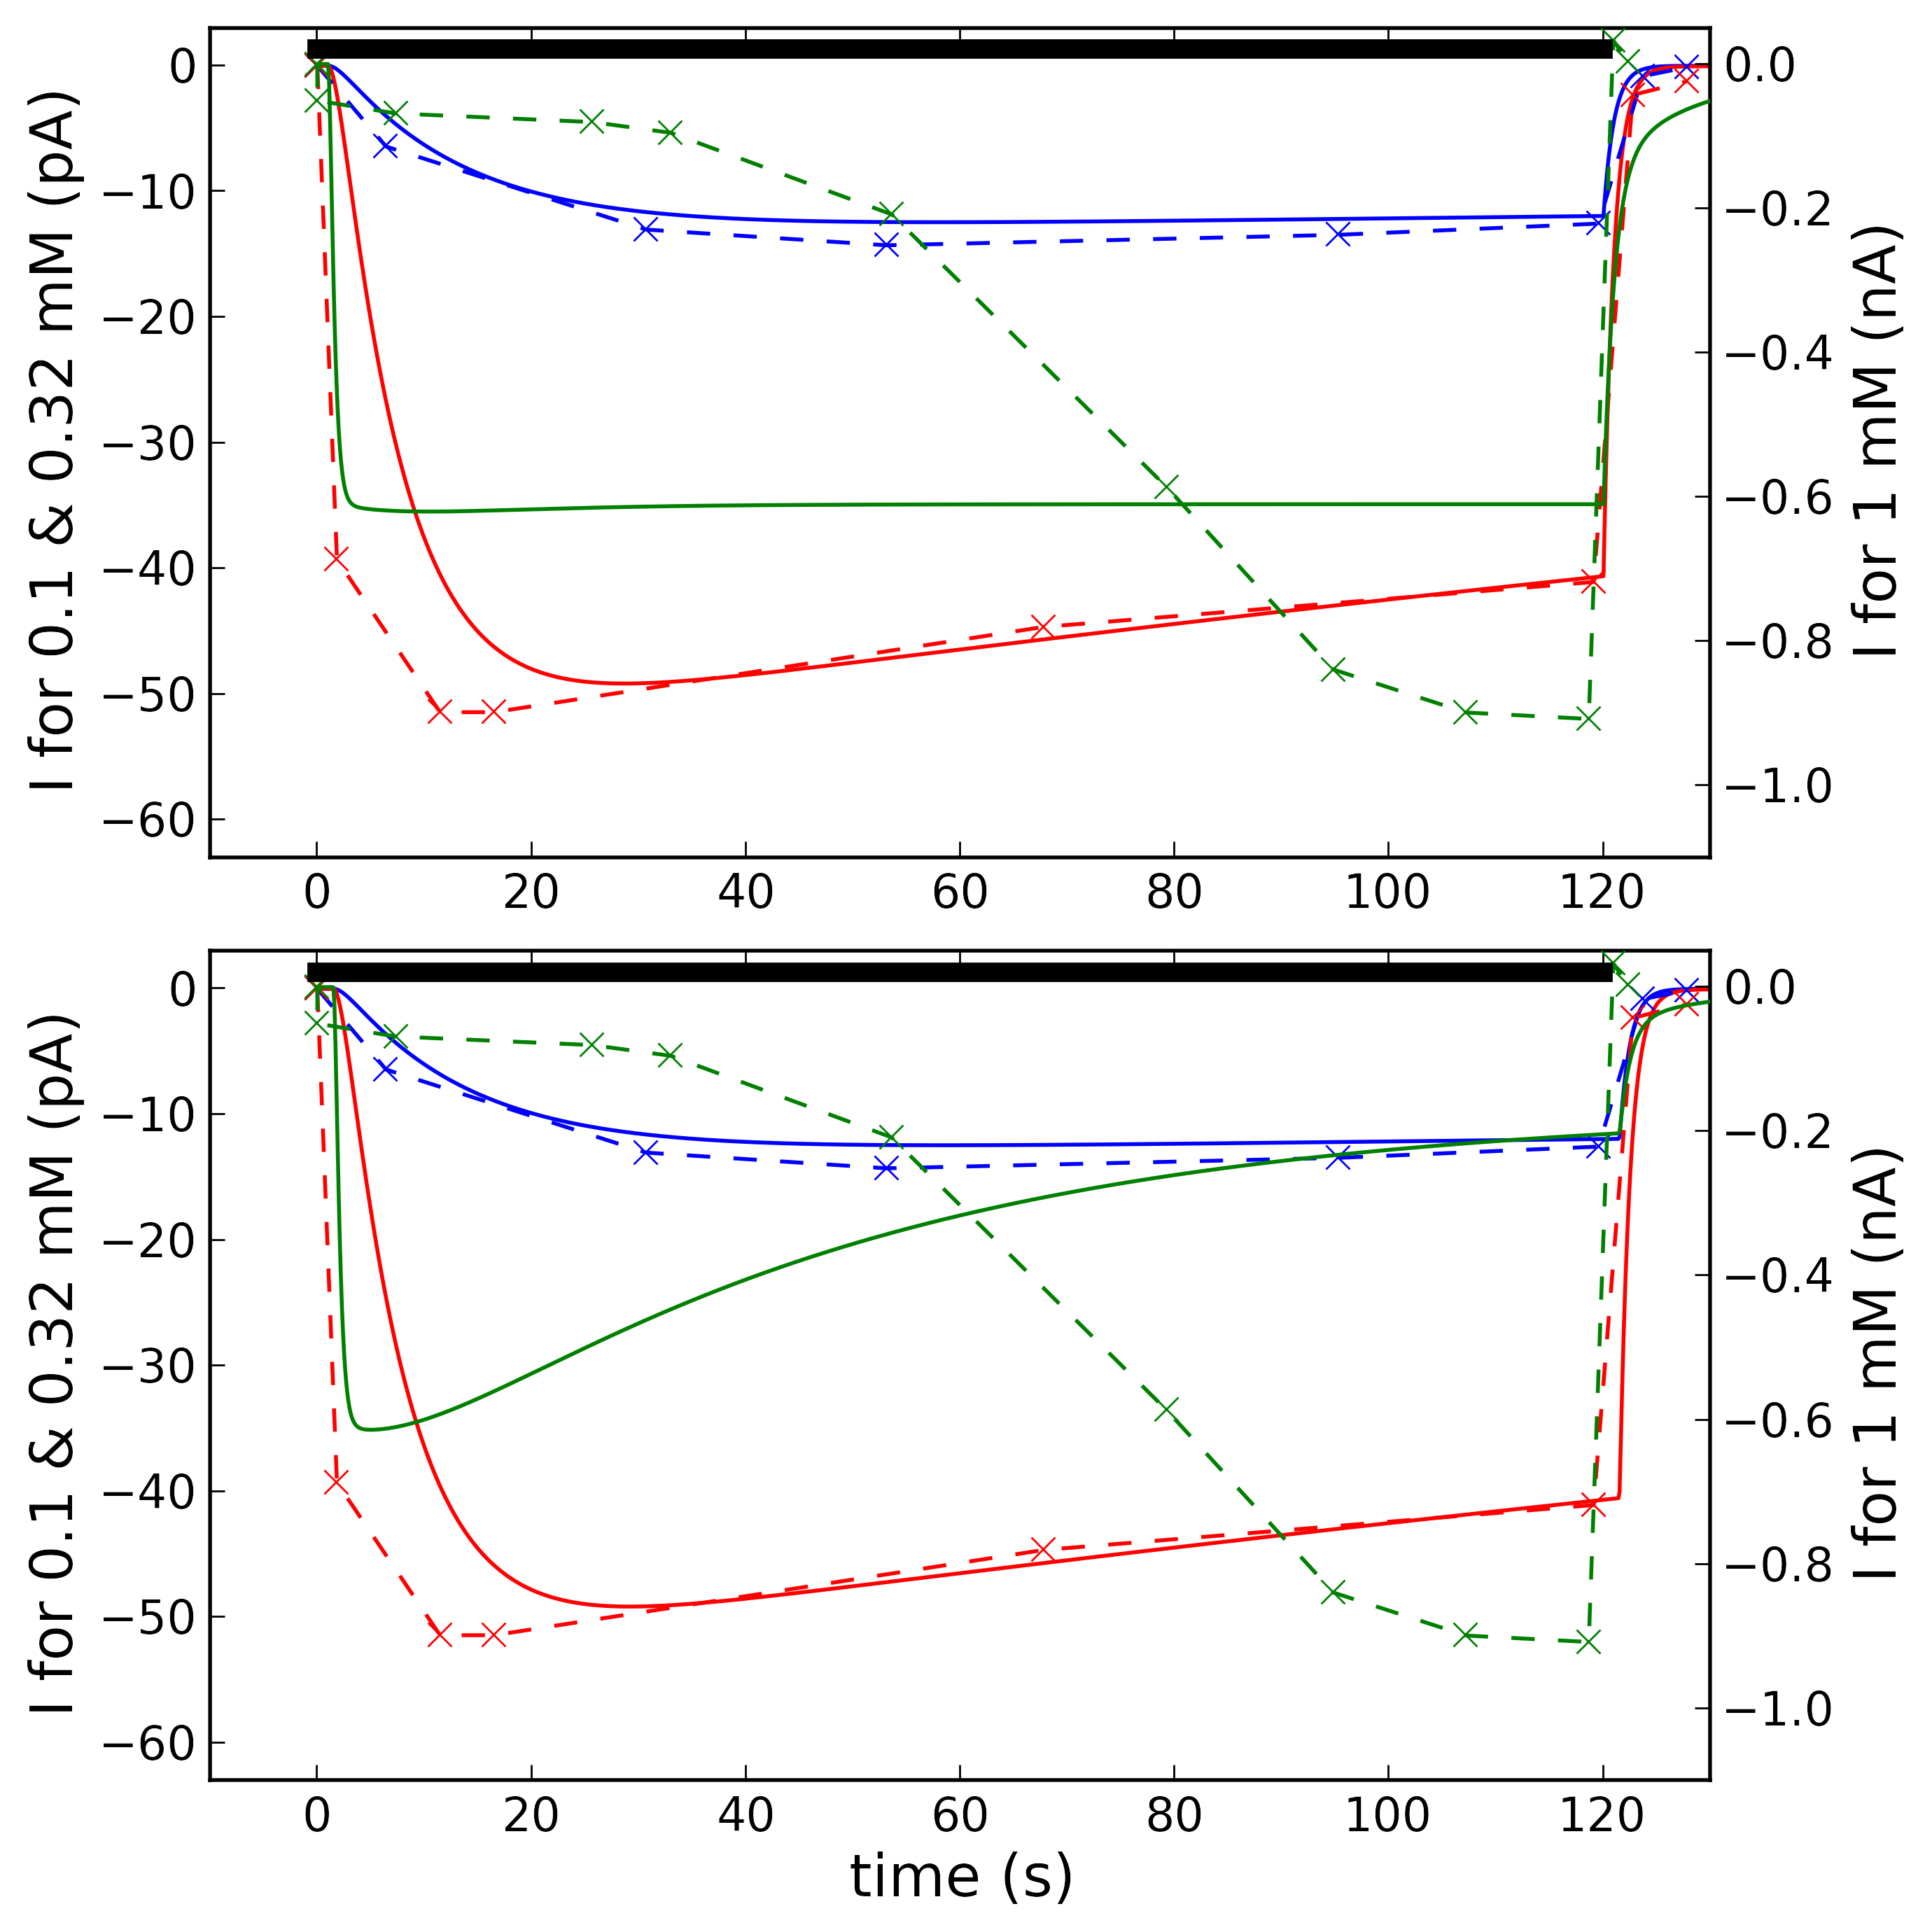

In [151]:
#stateLabel1 = "I_ptxf"
#subData0 = ao.GetData(data0,stateLabel1)
stateLabel2 = "I_ptxs"
subData1 = ao.GetData(data2,stateLabel2)
subData2 = ao.GetData(data3,stateLabel2)
subData3 = ao.GetData(data4,stateLabel2)

subData1a = ao.GetData(data2a,stateLabel2)
subData2a = ao.GetData(data3a,stateLabel2)
subData3a = ao.GetData(data4a,stateLabel2)

plt.figure(figsize=(7,7),dpi=400)
ax = plt.subplot(2,1,1)
ax2 = ax.twinx()
ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
lns1 = ax.plot(subData1.t,subData1.valsIdx*10**9,'b-',label="Model - 100 uM ATP")
lns2 = ax.plot(subData2.t,subData2.valsIdx*10**9,'r-',label="Model - 320 uM ATP")
lns3 = ax2.plot(subData3.t,subData3.valsIdx*10**6,'g-',label="Model - 1.0 mM ATP")
lns4 = ax.plot(t12,y12*10**3,'b--x',label="Yan - 100 uM ATP")
lns5 = ax.plot(t11,y11*10**3,'r--x',label="Yan - 320 uM ATP")
lns6 = ax2.plot(t15,y15,'g--x',label="Yan - 1.0 mM ATP")
lns7 = ax2.plot([0,120],[0.02,0.02],'black',lw=5,label="ATP")
#ax.set_xlabel("time (s)",fontsize=15)
ax.set_ylabel("I for 0.1 & 0.32 mM (pA)",fontsize=15)
ax2.set_ylabel("I for 1 mM (nA)",fontsize=15)
ax.set_ylim(-63,3)
ax2.set_ylim(-1.1,0.05)
ax.set_xlim(-10,130)
ax2.set_xlim(-10,130)
lns = lns1 + lns4 + lns2 + lns5 + lns3 + lns6 + lns7
labs = [l.get_label() for l in lns]
#ax.legend(lns,labs,loc=3,fontsize=12) 
plt.tight_layout()

ax = plt.subplot(2,1,2)
ax2 = ax.twinx()
ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
lns1 = ax.plot(subData1a.t,subData1a.valsIdx*10**9,'b-',label="Model used - 100 uM ATP")
lns2 = ax.plot(subData2a.t,subData2a.valsIdx*10**9,'r-',label="Model used - 320 uM ATP")
lns3 = ax2.plot(subData3a.t,subData3a.valsIdx*10**6,'g-',label="Model used - 1.0 mM ATP")
lns4 = ax.plot(t12,y12*10**3,'b--x',label="Yan - 100 uM ATP")
lns5 = ax.plot(t11,y11*10**3,'r--x',label="Yan - 320 uM ATP")
lns6 = ax2.plot(t15,y15,'g--x',label="Yan - 1.0 mM ATP")
lns7 = ax2.plot([0,120],[0.02,0.02],'black',lw=5,label="ATP")
ax.set_xlabel("time (s)",fontsize=15)
ax.set_ylabel("I for 0.1 & 0.32 mM (pA)",fontsize=15)
ax2.set_ylabel("I for 1 mM (nA)",fontsize=15)
ax.set_ylim(-63,3)
ax2.set_ylim(-1.1,0.05)
ax.set_xlim(-10,130)
ax2.set_xlim(-10,130)
lns = lns1 + lns4 + lns2 + lns5 + lns3 + lns6 + lns7
labs = [l.get_label() for l in lns]
#ax.legend(lns,labs,loc=0,fontsize=12) 
plt.tight_layout()

#plt.savefig("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-paper/microglia04092018/p2x7valid.png")

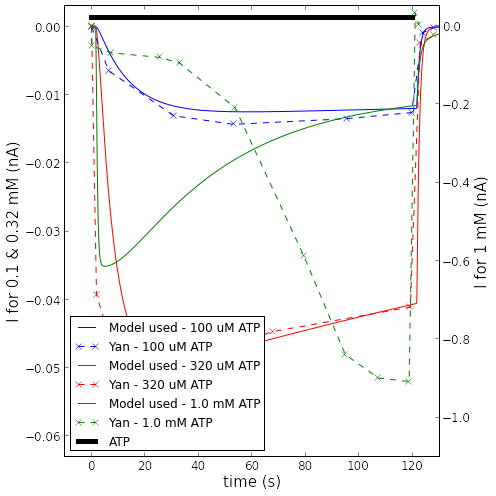

In [144]:
plt.figure(figsize=(7,7))
ax = plt.subplot(1,1,1)
ax2 = ax.twinx()
ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
lns1 = ax.plot(subData1a.t,subData1a.valsIdx*10**6,'b-',label="Model used - 100 uM ATP")
lns2 = ax.plot(subData2a.t,subData2a.valsIdx*10**6,'r-',label="Model used - 320 uM ATP")
lns3 = ax2.plot(subData3a.t,subData3a.valsIdx*10**6,'g-',label="Model used - 1.0 mM ATP")
lns4 = ax.plot(t12,y12,'b--x',label="Yan - 100 uM ATP")
lns5 = ax.plot(t11,y11,'r--x',label="Yan - 320 uM ATP")
lns6 = ax2.plot(t15,y15,'g--x',label="Yan - 1.0 mM ATP")
lns7 = ax2.plot([0,120],[0.02,0.02],'black',lw=5,label="ATP")
ax.set_xlabel("time (s)",fontsize=15)
ax.set_ylabel("I for 0.1 & 0.32 mM (nA)",fontsize=15)
ax2.set_ylabel("I for 1 mM (nA)",fontsize=15)
ax.set_ylim(-0.063,0.003)
ax2.set_ylim(-1.1,0.05)
ax.set_xlim(-10,130)
ax2.set_xlim(-10,130)
lns = lns1 + lns4 + lns2 + lns5 + lns3 + lns6 + lns7
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=0,fontsize=12) 
plt.tight_layout()

In [145]:
data1 = ao.readPickle("/home/AD/bch265/Data_storage/MG_0mMATP_cat.pickle")

Reading /home/AD/bch265/Data_storage/MG_0mMATP_cat.pickle


('Cai', 0.096128105922140508)
('CaF', 9.6335636290159794)
('Ca2_CaM', 0.022442185750519924)
('Ca4_CaM', 0.0020737954774323899)
('Ca4_CN', 0.026368901762458159)
('CaMCN', 0.54683709219844723)
('CaER', 664.29978209733065)
('CaS', 808.70412202276179)
('NFATpc', 1.0933854466226058)
('NFATpn', 3.5397030238920302e-05)
('NFATNn', 0.0064697696912087311)
('pp38', 2.5297989043231692)


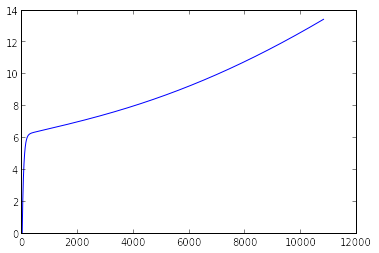

In [146]:
stateLabel2 = "Cai"
subData1 = ao.GetData(data1,stateLabel2)
print (stateLabel2,subData1.valsIdx[-1])

stateLabel2 = "CaF"
subData1 = ao.GetData(data1,stateLabel2)
print (stateLabel2,subData1.valsIdx[-1])

stateLabel2 = "Ca2_CaM"
subData1 = ao.GetData(data1,stateLabel2)
print (stateLabel2,subData1.valsIdx[-1])

stateLabel2 = "Ca4_CaM"
subData1 = ao.GetData(data1,stateLabel2)
print (stateLabel2,subData1.valsIdx[-1])

stateLabel2 = "Ca4_CN"
subData1 = ao.GetData(data1,stateLabel2)
print (stateLabel2,subData1.valsIdx[-1])

stateLabel2 = "CaMCN"
subData1 = ao.GetData(data1,stateLabel2)
print (stateLabel2,subData1.valsIdx[-1])

stateLabel2 = "CaER"
subData1 = ao.GetData(data1,stateLabel2)
print (stateLabel2,subData1.valsIdx[-1])

stateLabel2 = "CaS"
subData1 = ao.GetData(data1,stateLabel2)
print (stateLabel2,subData1.valsIdx[-1])

stateLabel2 = "NFATpc"
subData1 = ao.GetData(data1,stateLabel2)
print (stateLabel2,subData1.valsIdx[-1])

stateLabel2 = "NFATpn"
subData1 = ao.GetData(data1,stateLabel2)
print (stateLabel2,subData1.valsIdx[-1])

stateLabel2 = "NFATNn"
subData1 = ao.GetData(data1,stateLabel2)
print (stateLabel2,subData1.valsIdx[-1])

stateLabel2 = "pp38"
subData1 = ao.GetData(data1,stateLabel2)
print (stateLabel2,subData1.valsIdx[-1])

stateLabel2 = "TNFa_release"
subData1 = ao.GetData(data1,stateLabel2)

plt.plot(subData1.t,subData1.valsIdx)

(0, 120)

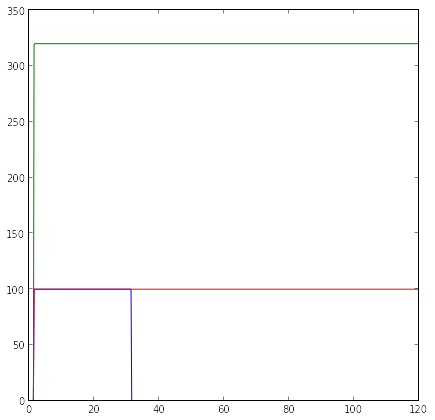

In [56]:
stateLabel2 = "ATPptxf"
subData1 = ao.GetData(data1,stateLabel2)

plt.figure(figsize=(7,7))

plt.plot(subData1.t,subData1.valsIdx*10**6,'b-',label="Model - 100 uM ATP")



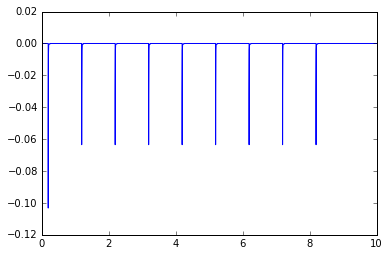

In [18]:
stateLabel = "I_ptxf"
subData = ao.GetData(data,stateLabel)
plt.plot(subData.t,subData.valsIdx)